<a href="https://colab.research.google.com/github/wesamgalal/1000-ML-Engineer-Initiative-NLP-/blob/main/Twitter_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read & Data analysis (Wesam)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import spacy
from spacy import displacy
Text_Visualization = spacy.load('en_core_web_sm')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
%pip install emoji
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
pd.set_option("display.max_colwidth", 200)  

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=3d83571c1b94c29d3d54800cf828bb98ff937d357163da63982b9f081912b413
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
#Read data
path_name="/content/drive/MyDrive/tweets.csv"
data=pd.read_csv(path_name,encoding='ISO-8859-1',header=None)
data=data.sample(10000)

data.head()

,0,1,2,3,4,5
133964,0,1836133398,Mon May 18 07:26:10 PDT 2009,NO_QUERY,adelinapadula,is very sick
1485267,4,2067837017,Sun Jun 07 13:02:43 PDT 2009,NO_QUERY,momentLIGHTING,That girl is like a sunburn.i would like to say shes like a sunburn
1507728,4,2174539120,Sun Jun 14 22:45:57 PDT 2009,NO_QUERY,adamadavidson,@AndoCJ It's a hard life. Hope you managed to sleep of the lunch Best way to avoid indigestion!!
300166,0,1998208588,Mon Jun 01 18:10:20 PDT 2009,NO_QUERY,brightondoll,"I so wish I would have remembered that tonight was the premiere of &quot;I'm a celebrity, get me out of here!&quot; - where can I go to see it???"
575910,0,2211318464,Wed Jun 17 12:42:26 PDT 2009,NO_QUERY,FameFameFame,Starbucks: latte. Then back to bed. saddddddd weeek so far.


In [ ]:
#create a name for each column to modify them easy
data.columns= ['Target', 'ID', 'Date', 'NO_QUERY', 'Auther', 'Post']
y_true = np.array(data['Target'])

data.head(5)

,Target,ID,Date,NO_QUERY,Auther,Post
976501,4,1833637357,Sun May 17 23:56:41 PDT 2009,NO_QUERY,asirupa,enjoying food prepared by mom
739762,0,2265808118,Sun Jun 21 07:20:58 PDT 2009,NO_QUERY,alexthebutcher,@buckhollywood awwww i wish i could say that t...
583682,0,2215027171,Wed Jun 17 17:34:13 PDT 2009,NO_QUERY,rschooler,@pumpupositive No seems like to have weight lo...
1082493,4,1968724351,Fri May 29 22:04:02 PDT 2009,NO_QUERY,BackstreetBB21,@cpark9 He was wonderful. Got to see him twice...
799303,0,2328937088,Thu Jun 25 10:09:39 PDT 2009,NO_QUERY,BlueEyesNoName,@samwoodslol you ass. I'm stuck in the side if...


In [ ]:
print(data.shape)
print("....................................")
data.info()
print("....................................")
print(data.dtypes)

(10000, 6)
....................................
             Target            ID
count  10000.000000  1.000000e+04
mean       1.962800  2.001707e+09
std        1.999754  1.923694e+08
min        0.000000  1.467842e+09
25%        0.000000  1.958123e+09
50%        0.000000  2.002288e+09
75%        4.000000  2.177755e+09
max        4.000000  2.329179e+09
....................................
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 976501 to 195807
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Target    10000 non-null  int64 
 1   ID        10000 non-null  int64 
 2   Date      10000 non-null  object
 3   NO_QUERY  10000 non-null  object
 4   Auther    10000 non-null  object
 5   Post      10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 546.9+ KB
Target       int64
ID           int64
Date        object
NO_QUERY    object
Auther      object
Post        object
dtype: object


In [ ]:
#data[0].value_counts().plot(kind='bar')
data["Target"].value_counts()

0    5093
4    4907
Name: Target, dtype: int64

# Cleaning Data (Wesam)

<font color='red'><font size = 5 >Start Cleaning our data</font>

<font color='blue'><font size = 2 >     1. Lowercasing all the letters</font>

In [ ]:
data['results'] = data['Post'].str.lower()
print(data)

In [ ]:
import re

<font color='blue'><font size = 2 >2.Removing Consecutive letters</font>
 

In [ ]:
#Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")
#cause some words like "all" if we replaced "ll" with only one "l" will lose the meaning
#str = "heyyyyyy"
#print(re.sub(r"(.)\1\1+", r"\1\1", str))
#output will be : heyy

def cleaning_repeating_char(text):
    return re.sub(r'(.)\1\1+', r'\1\1', text)
data['results'] = data['results'].apply(lambda x: cleaning_repeating_char(x))
data['results'].tail()


<font color='blue'><font size = 2 >3.Replace all emojis </font>


In [ ]:
data['results'] = data['results'].apply(lambda x: emoji.demojize(x,language='es'))
data['results'].tail()


<font color='blue'><font size = 2 >4. Remove Hashtags</font>

In [ ]:
def cleaning_hashtag(hash):
    hash_pattern = re.compile(r'#[A-Za-z0-9_]+')
    return hash_pattern.sub(r'', hash) 
data['results'] = data['results'].apply(lambda x: cleaning_hashtag(x))
data['results'].tail()

<font color='blue'><font size = 2 >5. Remove @ or mentions</font>

In [ ]:
def cleaning_ment(ment):
    ment_pattern = re.compile(r'@[A-Za-z0-9_]+')
    return ment_pattern.sub(r'', ment) 
data['results'] = data['results'].apply(lambda x: cleaning_ment(x))
data['results'].tail()

<font color='blue'><font size = 2 >6. Remove links</font>

In [ ]:
def cleaning_lnk(lnk):
    lnk_pattern = re.compile(r'http\S+|www.\S+|<.*?>')
    return lnk_pattern.sub(r'', lnk) 
data['results'] = data['results'].apply(lambda x: cleaning_lnk(x))
data['results'].tail()

In [ ]:
doc_dep = data["results"][:5].apply(lambda x: Text_Visualization(x))
option_dep ={'distance': 100, "color": "#28bf3f", "bg": "#193380", "font": "Arial"}
displacy.render(doc_dep, style='dep', jupyter=True, options=option_dep)

In [ ]:
doc_ent = data["results"][:10].apply(lambda x: Text_Visualization(x))
displacy.render(doc_ent, style='ent', jupyter=True)

<font color='blue'><font size = 2 >7. Remove puctuations and non-alphanumeric</font>

In [ ]:
#remove (any thing not alphanumeric,whitespace or digit)
def cleaning_punc(punc):
    for char in string.punctuation:
        punc = punc.replace(char, '')
    return punc
data['results'] = data['results'].apply(cleaning_punc)
data['results'].tail()

<font color='blue'><font size = 2 >6.Tokenization </font>

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from nltk.tokenize import word_tokenize
data['results'] = data['results'].apply(lambda x: word_tokenize(x))
data['results'].tail()

<font color='blue'><font size = 2 >7.Remove Stop Words </font>

In [ ]:
# Import stopwords using scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

In [ ]:
# add new column 'results' to be asigned with 'post' column values without stop words
data['results']= data['results'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
tokenword = data['Post'].apply(lambda x: word_tokenize(x))
res = data['results']

In [ ]:
print('Tokenized words:\n ',tokenword) 
print('\nNo-Stopwords:\n ',res)

In [ ]:
data

In [ ]:
# data['Post'] = data['Post'].apply(lambda x: ' '.join(x))
data['results'] = data['results'].apply(lambda x: ' '.join(x))

In [ ]:
data['results'].value_counts().head(n=20)

# Using NLP Tools 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [ ]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(data.Post.values)
features = vec.transform(data.results.values)

In [ ]:
feature_names=vec.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df=pd.DataFrame(features.toarray(),columns=feature_names)

In [ ]:
df.head(5)

,00,000,00pm,01,018,02,0205laura,0238,02meters,03,...,½s,½stico,½t,½ta,½ve,½y,½you,à¹,î¹,øªù
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
features.shape

(10000, 18472)

In [ ]:
cls = MiniBatchKMeans(n_clusters=2, random_state=1000)
cls.fit(features)

MiniBatchKMeans(n_clusters=2, random_state=1000)

In [ ]:
y_predict = cls.predict(features)

In [ ]:
cls.cluster_centers_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.03942602e-05, 1.27461645e-04, 1.24886397e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# # reduce the features to 2D
# pca = PCA(n_components=2, random_state=100)
# # IncrementalPCA=IncrementalPCA(n_components=7, batch_size=200)
# reduced_features = pca.fit_transform(features.toarray())
# reduced_features
# len(reduced_features) , len(reduced_features[0])

In [ ]:
# reduced_cluster_centers = pca.transform(cls.cluster_centers_)
# reduced_cluster_centers

In [ ]:
# plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
# plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# Mahmoud (Visualization)
#DEP & ENT Visualization
# Plot clusters
**reduce the features to 2D**

**reduce the cluster centers to 2D**

**plot cluster and cluster centers**






In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)
import os
import gc
gc.enable()
import time
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from scipy import stats
%matplotlib inline
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')
import urllib        #for url stuff

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast


from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os  # for os commands

import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [ ]:
df = data[data['results'].notnull()]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['results'] = le.fit_transform(df.results.values)

In [ ]:
# tsne code from this great kernel: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
# New_df is from the random undersample data (fewer instances)
import time
from sklearn.manifold import TSNE
X = df['results']
y = df['Target']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values.reshape(-1, 1))
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 1e+02 s


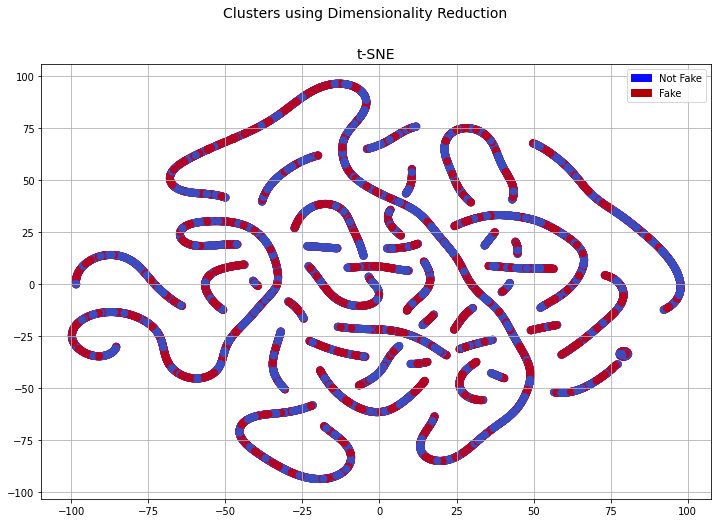

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,8))
# labels = ['Not Fake', 'Fake']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Fake')
red_patch = mpatches.Patch(color='#AF0000', label='Fake')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Not Fake', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 4), cmap='coolwarm', label='Fake', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


plt.show()

In [ ]:
html_tags = ['<P>', '</P>', '<Table>', '</Table>', '<Tr>', '</Tr>', '<Ul>', '<Ol>', '<Dl>', '</Ul>', '</Ol>', \
             '</Dl>', '<Li>', '<Dd>', '<Dt>', '</Li>', '</Dd>', '</Dt>']
r_buf = ['It', 'is', 'are', 'do', 'does', 'did', 'was', 'were', 'will', 'can', 'the', 'a', 'of', 'in', 'and', 'on', \
         'what', 'where', 'when', 'which'] + html_tags

def clean(x):
    x = x.lower()
    for r in r_buf:
        x = x.replace(r, '')
    x = re.sub(' +', ' ', x)
    return x

bin_question_tokens = ['it', 'is', 'are', 'do', 'does', 'did', 'was', 'were', 'will', 'can']
stop_words = text.ENGLISH_STOP_WORDS.union(["book"])

def predict(json_data, annotated=False):
    # Parse JSON data
    candidates = json_data['long_answer_candidates']
    candidates = [c for c in candidates if c['top_level'] == True]
    doc_tokenized = json_data['document_text'].split(' ')
    question = json_data['question_text']
    question_s = question.split(' ') 
    if annotated:
        ann = json_data['annotations'][0]

    # TFIDF for the document
    tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words=stop_words)
    tfidf.fit([json_data['document_text']])
    q_tfidf = tfidf.transform([question]).todense()

    # Find the nearest answer from candidates
    distances = []
    scores = []
    i_ann = -1
    for i, c in enumerate(candidates):
        s, e = c['start_token'], c['end_token']
        t = ' '.join(doc_tokenized[s:e])
        distances.append(levenshtein_distance(clean(question), clean(t)))
        
        t_tfidf = tfidf.transform([t]).todense()
        score = 1 - spatial.distance.cosine(q_tfidf, t_tfidf)
        
#         score = 0
        
#         for w in doc_tokenized[s:e]:
#             if w in q_s:
#                 score += 0.1

        scores.append(score)

    # Format results
#     ans = candidates[np.argmin(distances)]
    ans = candidates[np.argmax(scores)]
    if np.max(scores) < 0.2:
        ans_long = '-1:-1'
    else:
        ans_long = str(ans['start_token']) + ':' + str(ans['end_token'])
    if question_s[0] in bin_question_tokens:
        ans_short = 'YES'
    else:
        ans_short = ''
        
    # Preparing data for debug
    if annotated:
        ann_long_text = ' '.join(doc_tokenized[ann['long_answer']['start_token']:ann['long_answer']['end_token']])
        if ann['yes_no_answer'] == 'NONE':
            if len(json_data['annotations'][0]['short_answers']) > 0:
                ann_short_text = ' '.join(doc_tokenized[ann['short_answers'][0]['start_token']:ann['short_answers'][0]['end_token']])
            else:
                ann_short_text = ''
        else:
            ann_short_text = ann['yes_no_answer']
    else:
        ann_long_text = ''
        ann_short_text = ''
        
    ans_long_text = ' '.join(doc_tokenized[ans['start_token']:ans['end_token']])
    if len(ans_short) > 0 or ans_short == 'YES':
        ans_short_text = ans_short
    else:
        ans_short_text = '' # Fix when short answers will work
                    
    return ans_long, ans_short, question, ann_long_text, ann_short_text, ans_long_text, ans_short

In [ ]:
reindexed_data = data['Post'] #.str.decode("utf-8", errors="ignore")

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii',errors="ignore").decode('utf-8',errors="ignore") for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

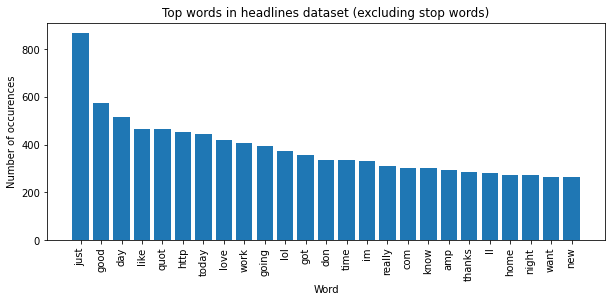

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

# Clustering (Brahim)

In [ ]:
features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Particle Swarm Optimization clustering

In [ ]:
import pandas as pd
import numpy as np
from pso import ParticleSwarmOptimizedClustering

pso = ParticleSwarmOptimizedClustering(n_cluster=2,n_particles=10,max_iter=10,data=features.toarray(),hybrid=True,print_debug=50)  
hist=pso.run()

print("fitness value",hist[0][-1])

ModuleNotFoundError: ignored

In [ ]:
label=hist[-1]

Hirarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster =AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hirarchi_labels=hierarchical_cluster.fit(features.toarray())


# Evaluation (Abd Ulfatah)


###  Evaluation two clusters

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score,adjusted_mutual_info_score,mutual_info_score,normalized_mutual_info_score,v_measure_score,homogeneity_score,completeness_score


In [ ]:
adjusted_rand_score(y_true,y_predict)

-5.446288137959454e-05

In [ ]:

adjusted_rand_score(y_true,label)

NameError: ignored

In [ ]:
adjusted_mutual_info_score(y_true,y_predict)

-0.00010561909431556899

In [ ]:
adjusted_mutual_info_score(y_true,label)

NameError: ignored

In [ ]:
mutual_info_score(y_true,y_predict)

5.031570654165374e-06

In [ ]:
mutual_info_score(y_true,label)

NameError: ignored

In [ ]:
normalized_mutual_info_score(y_true,y_predict)

In [ ]:
normalized_mutual_info_score(y_true,label)

In [ ]:
v_measure_score(y_true,y_predict)

In [ ]:
v_measure_score(y_true,label)

In [ ]:
homogeneity_score(y_true,y_predict)

In [ ]:
homogeneity_score(y_true,label)

In [ ]:
completeness_score(y_true,y_predict)

In [ ]:
completeness_score(y_true,label)

In [ ]:
pip install pycocotools==2.0.0

In [ ]:
import numpy

In [ ]:
!pip install --upgrade numpy

In [ ]:
#!pip install gensim
!pip install --upgrade gensim

In [ ]:
import gensim

In [ ]:
#!pip install pyldavis

In [ ]:
import pyLDAvis

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping
